In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

#there are more columns than default setting
pd.set_option('display.max_columns', 500)

In [11]:
# let's load in the data
df = pd.read_csv('data/supply_chain_data.csv').set_index('SKU') # stock keeping unit as index
df.head()

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
SKU,,,,,,,,,,,,,,,,,,,,,,,
SKU0,haircare,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
SKU1,skincare,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
SKU2,haircare,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
SKU3,skincare,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
SKU4,skincare,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [12]:
# basic descriptions for all data
df.describe(include='all')

,Product type,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
count,100,100.000000,100.000000,100.000000,100.000000,100,100.000000,100.000000,100.000000,100.000000,100,100.000000,100,100,100.000000,100.000000,100.00000,100.000000,100,100.000000,100,100,100.000000
unique,3,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,3,NaN,5,5,NaN,NaN,NaN,NaN,3,NaN,4,3,NaN
top,skincare,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,Carrier B,NaN,Supplier 1,Kolkata,NaN,NaN,NaN,NaN,Pending,NaN,Road,Route A,NaN
freq,40,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,43,NaN,27,25,NaN,NaN,NaN,NaN,41,NaN,29,43,NaN
mean,NaN,49.462461,48.400000,460.990000,5776.048187,NaN,47.770000,15.960000,49.220000,5.750000,NaN,5.548149,NaN,NaN,17.080000,567.840000,14.77000,47.266693,NaN,2.277158,NaN,NaN,529.245782
std,NaN,31.168193,30.743317,303.780074,2732.841744,NaN,31.369372,8.785801,26.784429,2.724283,NaN,2.651376,NaN,NaN,8.846251,263.046861,8.91243,28.982841,NaN,1.461366,NaN,NaN,258.301696
min,NaN,1.699976,1.000000,8.000000,1061.618523,NaN,0.000000,1.000000,1.000000,1.000000,NaN,1.013487,NaN,NaN,1.000000,104.000000,1.00000,1.085069,NaN,0.018608,NaN,NaN,103.916248
25%,NaN,19.597823,22.750000,184.250000,2812.847151,NaN,16.750000,8.000000,26.000000,3.750000,NaN,3.540248,NaN,NaN,10.000000,352.000000,7.00000,22.983299,NaN,1.009650,NaN,NaN,318.778455
50%,NaN,51.239831,43.500000,392.500000,6006.352023,NaN,47.500000,17.000000,52.000000,6.000000,NaN,5.320534,NaN,NaN,18.000000,568.500000,14.00000,45.905622,NaN,2.141863,NaN,NaN,520.430444
75%,NaN,77.198228,75.000000,704.250000,8253.976921,NaN,73.000000,24.000000,71.250000,8.000000,NaN,7.601695,NaN,NaN,25.000000,797.000000,23.00000,68.621026,NaN,3.563995,NaN,NaN,763.078231


In [18]:
df.isna().sum()
# there are no null values

Product type               0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [17]:
df.duplicated().sum()
# there are also no duplicates

0

In [19]:
df.columns 

Index(['Product type', 'Price', 'Availability', 'Number of products sold',
       'Revenue generated', 'Customer demographics', 'Stock levels',
       'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers',
       'Shipping costs', 'Supplier name', 'Location', 'Lead time',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Inspection results', 'Defect rates', 'Transportation modes', 'Routes',
       'Costs'],
      dtype='object')

In [25]:
# sum of all numeric colums descending grouped by product type
df.groupby('Product type').sum(numeric_only=True).sort_values(by='Price', ascending=False)

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
Product type,,,,,,,,,,,,,,,
skincare,1890.373155,2037,20731,241628.162133,1608,668,2099,213,196.387510,720,24366,551,1959.726295,93.387231,22229.318068
haircare,1564.485482,1471,13611,174455.390605,1644,528,1480,191,200.863735,636,19957,580,1647.571776,84.427107,17328.862865
cosmetics,1491.387498,1332,11757,161521.265999,1525,400,1343,171,157.563663,352,12461,346,1119.371253,49.901461,13366.397283


In [32]:
# mean of all numeric colums descending grouped by product type
df.groupby('Product type').mean(numeric_only=True).sort_values(by='Price', ascending=False)

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
Product type,,,,,,,,,,,,,,,
cosmetics,57.361058,51.230769,452.192308,6212.356385,58.653846,15.384615,51.653846,6.576923,6.060141,13.538462,479.269231,13.307692,43.052740,1.919287,514.092203
skincare,47.259329,50.925000,518.275000,6040.704053,40.200000,16.700000,52.475000,5.325000,4.909688,18.000000,609.150000,13.775000,48.993157,2.334681,555.732952
haircare,46.014279,43.264706,400.323529,5131.040900,48.352941,15.529412,43.529412,5.617647,5.907757,18.705882,586.970588,17.058824,48.457993,2.483150,509.672437


In [33]:
# minimum value of all numeric colums descending grouped by product type
df.groupby('Product type').min(numeric_only=True).sort_values(by='Price', ascending=False)

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
Product type,,,,,,,,,,,,,,,
skincare,4.078333,1,65,1229.591029,1,1,10,1,1.013487,1,173,1,1.085069,0.021170,110.364335
cosmetics,2.397275,3,25,1061.618523,4,1,7,1,1.512937,1,152,1,1.900762,0.018608,103.916248
haircare,1.699976,1,8,1292.458418,0,1,1,1,1.194252,1,104,1,11.440782,0.165872,141.920282


In [34]:
# maximum value of all numeric colums descending grouped by product type
df.groupby('Product type').max(numeric_only=True).sort_values(by='Price', ascending=False)

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
Product type,,,,,,,,,,,,,,,
skincare,99.171329,100,996,9655.135103,96,30,96,10,9.716575,30,964,30,97.829050,4.939255,995.929461
cosmetics,97.760086,97,987,9692.318040,100,29,95,10,9.929816,28,953,29,99.466109,4.754801,996.778315
haircare,97.446947,99,946,9866.465458,100,30,96,10,9.741292,29,985,30,97.730594,4.843457,997.413450


In [31]:
# count of all stock keeping units grouped by product type
df.groupby('Product type')['Price'].count()

Product type
cosmetics    26
haircare     34
skincare     40
Name: Price, dtype: int64

In [35]:
# unique values for each non-numerical column
for column in df.select_dtypes(include=['object']).columns.tolist():
    unique_values = df[column].unique()
    print(f"Unique values for {column}")
    print(unique_values)
    print("--------------------")

Unique values for Product type
['haircare' 'skincare' 'cosmetics']
--------------------
Unique values for Customer demographics
['Non-binary' 'Female' 'Unknown' 'Male']
--------------------
Unique values for Shipping carriers
['Carrier B' 'Carrier A' 'Carrier C']
--------------------
Unique values for Supplier name
['Supplier 3' 'Supplier 1' 'Supplier 5' 'Supplier 4' 'Supplier 2']
--------------------
Unique values for Location
['Mumbai' 'Kolkata' 'Delhi' 'Bangalore' 'Chennai']
--------------------
Unique values for Inspection results
['Pending' 'Fail' 'Pass']
--------------------
Unique values for Transportation modes
['Road' 'Air' 'Rail' 'Sea']
--------------------
Unique values for Routes
['Route B' 'Route C' 'Route A']
--------------------


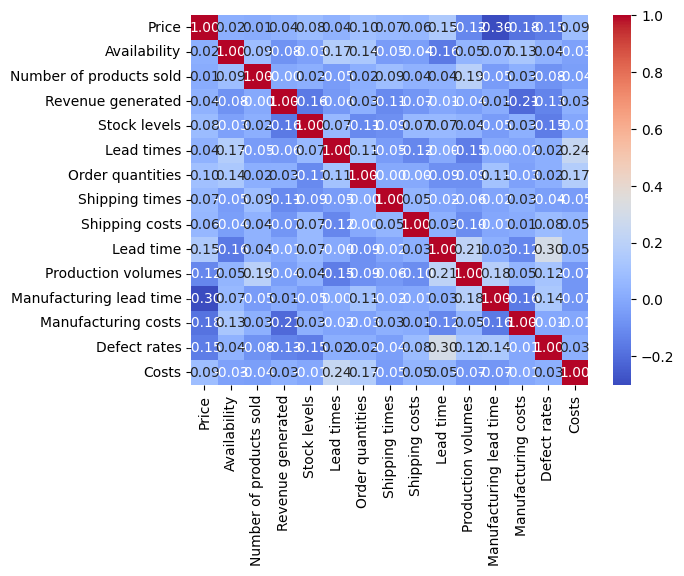

In [39]:
corr = df.corr(numeric_only=True).round(2)

# now let's generate the correlogram
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=',.2f')
plt.show()